**After this laboratory you should be able to**

- Define graphs
- Explain **degrees + average degree**. Know how to plot the distribution of nodes (histogram).
- Explain the **clustering coefficient**.
- Form an intuition about **node centralities**


In [2]:
import os
import sys

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import scipy
import io
from scipy.io import mmread

In [3]:
# Append parent path so we can access the `utils` package. It's a workaround.
parent_dir = os.path.abspath(os.path.join(".."))
if not parent_dir in sys.path:
    sys.path.append(parent_dir)

from utils.utils import load_graph

http://networksciencebook.com/chapter/2#networks-graphs


**Statistics review**

- https://web.mit.edu/~csvoss/Public/usabo/stats_handout.pdf
- https://www.stat.auckland.ac.nz/~fewster/325/notes/ch3.pdf


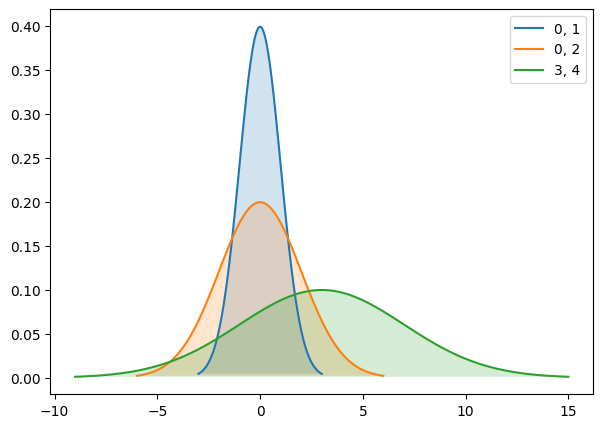

In [4]:
plt.figure(figsize=(7, 5))

mus = [0, 0, 3]  # Moves the center left or right
stds = [1, 2, 4]  # the bigger the flatter
for mu, std in zip(mus, stds):
    x = np.linspace(mu - 3 * std, mu + 3 * std, 100)  # Get 100 equally spaced values between [mu - 3*std, mu + 3*std]
    y = scipy.stats.norm.pdf(x, mu, std)
    plt.plot(x, y, label=f"{mu}, {std}")  # Plot lines
    plt.fill(x, y, alpha=0.2)  # Fill plots
    plt.legend()

plt.show()

In [5]:
X = np.array(
    [[1, 2, 3], [4, 5, 6]],
)

print(np.mean(X))
print(np.mean(X, axis=0))  # Mean over cols
print(np.mean(X, axis=1))  # Mean over rows
print()
print(np.std(X))
print(np.std(X, axis=0))  # std over cols
print(np.std(X, axis=1))  # std over rows

print()
print(np.var(X))
print(np.var(X, axis=0))
print(np.var(X, axis=1))

3.5
[2.5 3.5 4.5]
[2. 5.]

1.707825127659933
[1.5 1.5 1.5]
[0.81649658 0.81649658]

2.9166666666666665
[2.25 2.25 2.25]
[0.66666667 0.66666667]


In [6]:
np.var(X) == np.std(X) ** 2

True

In [7]:
# Variance with formula

print(np.sum((X - np.mean(X, axis=0)) ** 2, axis=0) / len(X))
print(np.sum((X.T - np.mean(X, axis=1)) ** 2, axis=0) / len(X[0]))

[2.25 2.25 2.25]
[0.66666667 0.66666667]


In [8]:
np.cov(X)

array([[1., 1.],
       [1., 1.]])

# Graphs

**Graph**  
 $G = (V,E)$  
 $V$ = graph components: nodes, vertices $u \in V$  
 $E$ = graph interactions: links, edges

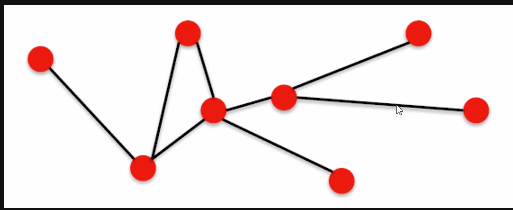


In [9]:
# nx.from_scipy_sparse_array

In [10]:
# Download and load graphs.

G_pgrid = load_graph("power-us-grid")
G_arvix = load_graph("arvix")
G_fb = load_graph("facebook")
G_wiki = load_graph("wiki")
G_cora = load_graph("cora")

In [11]:
# Load them locally

# https://networkrepository.com/power.php
G_pgrid = nx.from_scipy_sparse_array(mmread(os.path.join("..", "data", "power-US-Grid.mtx")))
node_map = {u: int(u) for u in G_pgrid.nodes}
G_pgrid = nx.relabel_nodes(G_pgrid, node_map, copy=True)

# https://snap.stanford.edu/data/ca-GrQc.html or https://networkrepository.com/ca-GrQc.php
G_arvix = nx.read_edgelist(
    os.path.join(
        "..",
        "data",
        "collaboration_network_of_arxiv_general_relativity_category.txt",
    )
)
# http://snap.stanford.edu/data/ego-Facebook.html
G_fb = nx.read_edgelist(os.path.join("..", "data", "facebook_combined.txt"))
# http://snap.stanford.edu/data/wiki-Vote.html
G_wiki = nx.read_edgelist(os.path.join("..", "data", "wiki_vote.txt"))

# https://networkrepository.com/cora.php
G_cora = nx.readwrite.graphml.read_graphml(os.path.join("..", "data", "cora.graphml"))

In [58]:
print("power grid: ", G_pgrid)
print("Arvix collaboration network: ", G_arvix)
print("Facebook: ", G_fb)
print("Wiki Vote: ", G_wiki)
print("Cora: ", G_cora)

power grid:  Graph with 4941 nodes and 6594 edges
Arvix collaboration network:  Graph with 5242 nodes and 14496 edges
Facebook:  Graph with 4039 nodes and 88234 edges
Wiki Vote:  Graph with 7115 nodes and 100762 edges
Cora:  DiGraph with 2485 nodes and 5069 edges


# Degrees


**Degree -- Definition**  
Number of links connected to the node $k_i$.

**Average node degree -- Definition**  
Sum of the degrees and divided by the number of nodes.

$$\langle k \rangle \equiv \dfrac 1 N \sum^N_{i=1}k_i$$

In undirected graphs

- $\langle k \rangle \equiv \dfrac {2E} N$

Directed graphs

- $\langle k^{in} \rangle \equiv \dfrac 1 N \sum^N_{i=1}k_i^{in} = \dfrac E N$
- $\langle k^{out} \rangle \equiv \dfrac 1 N \sum^N_{i=1}k_i^{out}$

$\langle k \rangle \equiv \dfrac {E} N$


### Node degree distribution

Let

- $N_k =$ number of nodes with degree $k$
- $P(k)$ = probability that a randomly chosen node has degree $k$

> Then $P(k) = \dfrac {N_k} N$

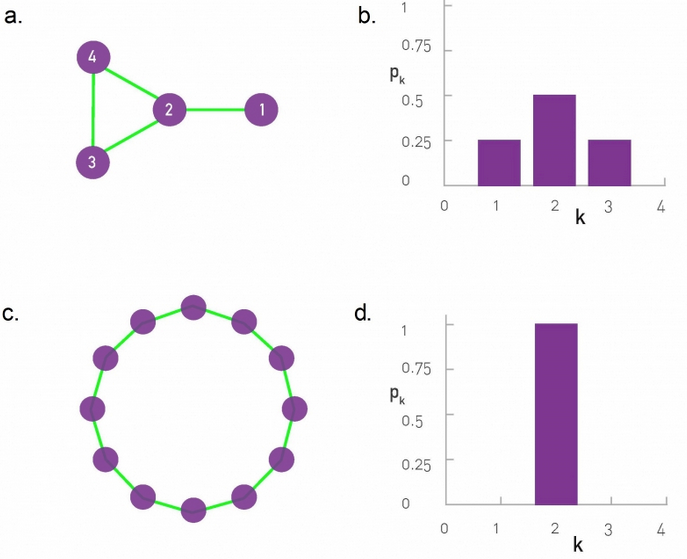


In [59]:
def average_degree(G: nx.Graph) -> float:
    return sum(G.degree(n) for n in G.nodes) / len(G.nodes)


def average_in(G: nx.Graph) -> float:
    return sum(G.in_degree(n) for n in G.nodes) / len(G.nodes)


def average_out(G: nx.Graph) -> float:
    return sum(G.out_degree(n) for n in G.nodes) / len(G.nodes)

In [60]:
print(average_degree(G_pgrid))
print(average_degree(G_arvix))
print(average_degree(G_fb))
print(average_degree(G_wiki))
print(average_degree(G_cora))

2.66909532483303
5.530713468141931
43.69101262688784
28.32382290934645
4.0796780684104625


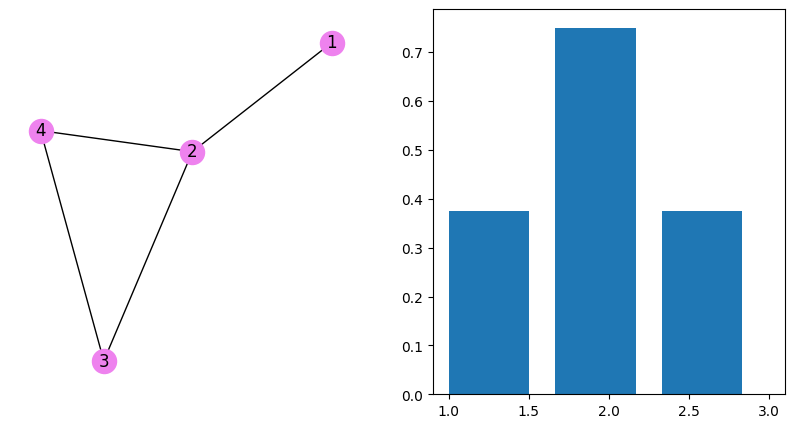

In [61]:
G = nx.cycle_graph(12)
G = nx.Graph([(1, 2), (2, 4), (2, 3), (3, 4)])


fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plot graph
nx.draw_kamada_kawai(G, with_labels=True, node_color="violet", ax=axs[0])

# Plot hist
# plt.subplot(2, 2, 2)
axs[1].hist([G.degree(n) for n in G.nodes], density=True, bins=3, width=0.5)
plt.show()

<Figure size 2000x500 with 0 Axes>

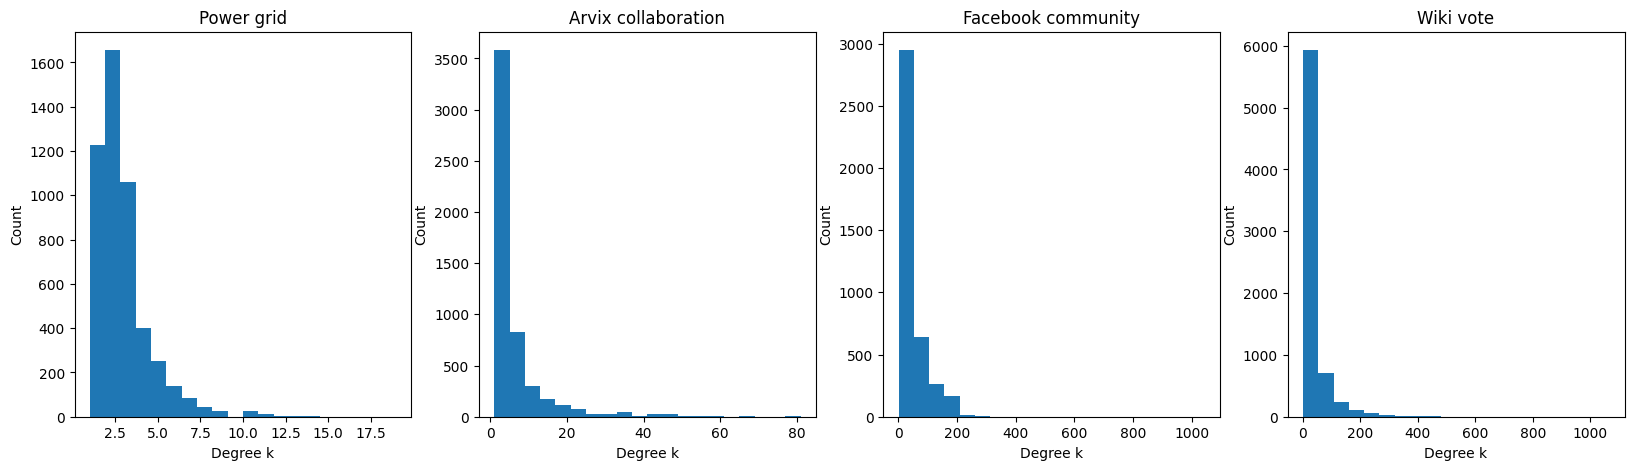

In [62]:
plt.figure(figsize=(4 * 5, 5))
real_graphs = [G_pgrid, G_arvix, G_fb, G_wiki]
titles = [
    "Power grid",
    "Arvix collaboration",
    "Facebook community",
    "Wiki vote",
]

fig, axs = plt.subplots(1, 4, figsize=(20, 5))
for i, (G, title) in enumerate(zip(real_graphs, titles)):
    axs[i].set_title(title)
    axs[i].hist([G.degree(u) for u in G.nodes], bins=20)
    axs[i].set_xlabel("Degree k")
    axs[i].set_ylabel("Count")

plt.show()

Maximum umber of edges $$E_{max} = \dfrac {N(N-1)} 2$$


True


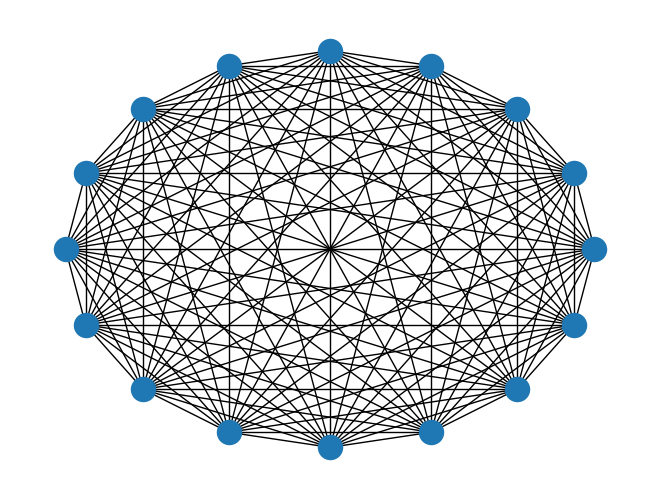

In [21]:
G = nx.complete_graph(n=16)
nx.draw_circular(G)

print(len(G.edges) == len(G.nodes) * (len(G.nodes) - 1) / 2)

# 3. Connectedness


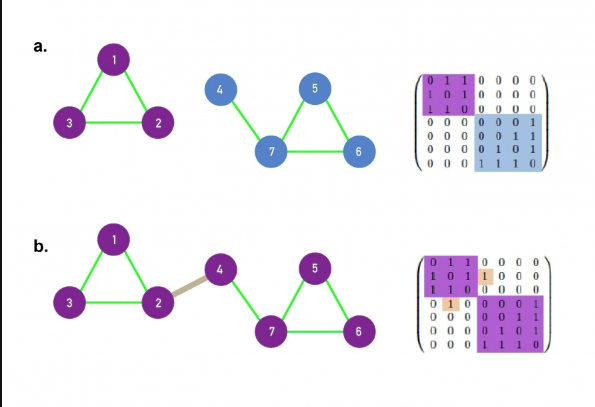


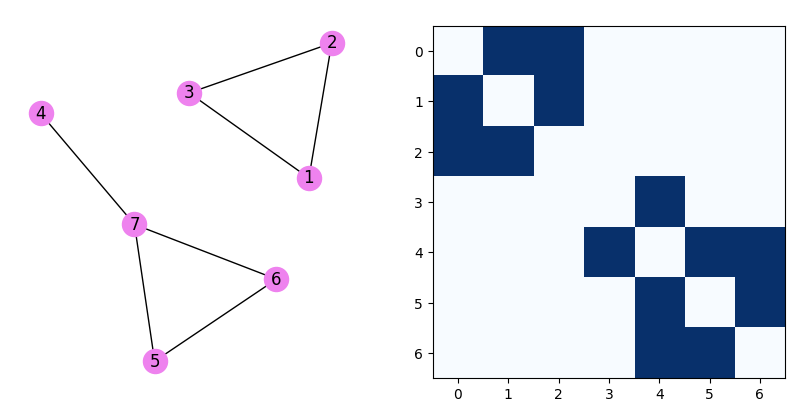

In [22]:
G = nx.Graph([(1, 2), (2, 3), (3, 1), (4, 7), (5, 7), (5, 6), (6, 7)])
A = nx.adjacency_matrix(G).todense()
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
nx.draw_kamada_kawai(G, with_labels=True, node_color="violet", ax=axs[0])
axs[1].imshow(A, cmap="Blues")
plt.show()

In [23]:
print(nx.is_connected(G))
l_connected_components = list(nx.connected_components(G))
print(l_connected_components)

Gs0 = G.subgraph(l_connected_components[0])
Gs1 = G.subgraph(l_connected_components[1])

print(Gs0.nodes, Gs1.nodes)

False
[{1, 2, 3}, {4, 5, 6, 7}]
[1, 2, 3] [4, 7, 5, 6]


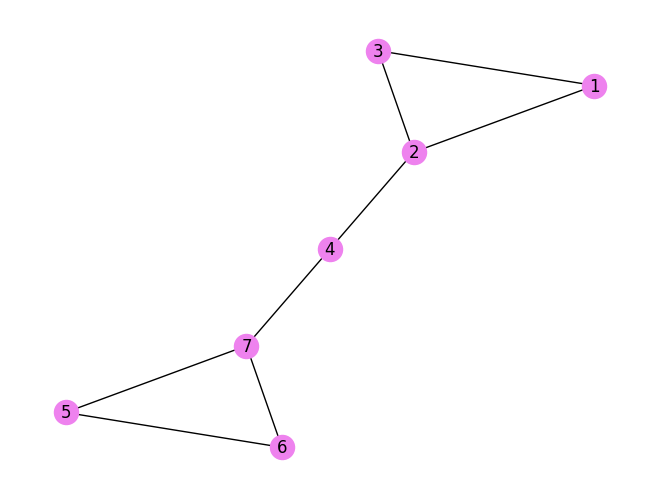

In [24]:
G.add_edge(4, 2)
nx.draw_kamada_kawai(G, with_labels=True, node_color="violet")

In [25]:
list(nx.bridges(G))

[(2, 4), (4, 7)]

# 4. Clustering coeffs


**What fraction of your neighbours are connected?**
$$C_i = \dfrac {\text{Number of connections between neighbors of } i} {\text{Max num of possible connections between neighbours of } i} = \dfrac {2E_i} {k_i(k_i-1)}$$
$C \in [0, 1]$

_Intuition_

- _Friend of a friend is my friend_ -- Friend triangles
- Out of all the posible edges that connect the neighbours of $i$, how many exist?
- $C_i = 0 \to$ none of the neighbours of $i$ link to each other
- $C_i = 1 \to$ all of the neighbours of $i$ link to each other => complete graph
- $C_i = p \to$ neighbours of $i$ link to each other with a probability of $p$


In [114]:
def clustering_coef(G: nx.Graph, u: int):
    """
    Return the clustering coefficient of node `u` from graph `G`

    Parameters:
    -----------
    G: nx.Graph
        Input graph
    u: int
        Node to calculate the clustering coefficient of.

    Returns:
    --------
    clustering coeff: int

    """
    ei = 0
    for i in G.neighbors(u):  # For each neighbour `i` of `u`
        for j in G.neighbors(u):  # For each neighbour `j` of `u`
            if i != j:  # no self loops
                ei += G.has_edge(i, j)  # Check if it has edge and add it to the total edges
    return ei / (G.degree(u) * (G.degree(u) - 1))  # divide by 2 because we count the edges twice

<Figure size 1500x700 with 0 Axes>

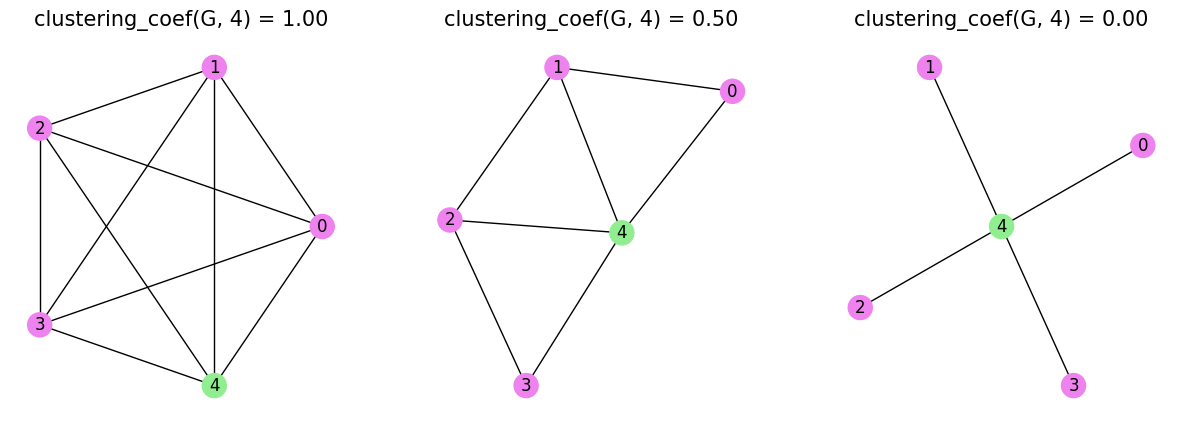

In [119]:
plt.figure(figsize=(15, 7))

G1 = nx.complete_graph(5)
G2 = nx.Graph([(0, 1), (0, 4), (1, 2), (1, 4), (2, 3), (2, 4), (3, 4)])
G3 = nx.Graph([(0, 4), (1, 4), (2, 4), (3, 4)])
graphs = [G1, G2, G3]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
for i, G in enumerate(graphs):
    node_color = ["violet" if u != 4 else "lightgreen" for u in G.nodes]
    axs[i].set_title(f"{clustering_coef(G, 4) = :.2f}", size=15)
    nx.draw_kamada_kawai(G, with_labels=True, node_color=node_color, ax=axs[i])

In [120]:
clustering_coef(G1, 4), clustering_coef(G2, 4), clustering_coef(G3, 4)

(1.0, 0.5, 0.0)

In [29]:
nx.clustering(G2)  # Clustering coeff for each node

{0: 1.0, 1: 0.6666666666666666, 4: 0.5, 2: 0.6666666666666666, 3: 1.0}

In [30]:
nx.clustering(G1)[4], nx.clustering(G2)[4], nx.clustering(G3)[4]  # Compare with the networkx function

(1.0, 0.5, 0)

In [140]:
nx.adjacency_matrix(G2).todense() @ nx.adjacency_matrix(G2).todense()  # A^2

array([[2, 1, 1, 2, 1],
       [1, 3, 2, 1, 2],
       [1, 2, 4, 2, 1],
       [2, 1, 2, 3, 1],
       [1, 2, 1, 1, 2]])

In [147]:
nx.average_clustering(G2), np.mean(list(nx.clustering(G2).values()))

(0.7666666666666666, 0.7666666666666666)

# 5. Centralities

[Good blogpost](https://cambridge-intelligence.com/keylines-faqs-social-network-analysis/)


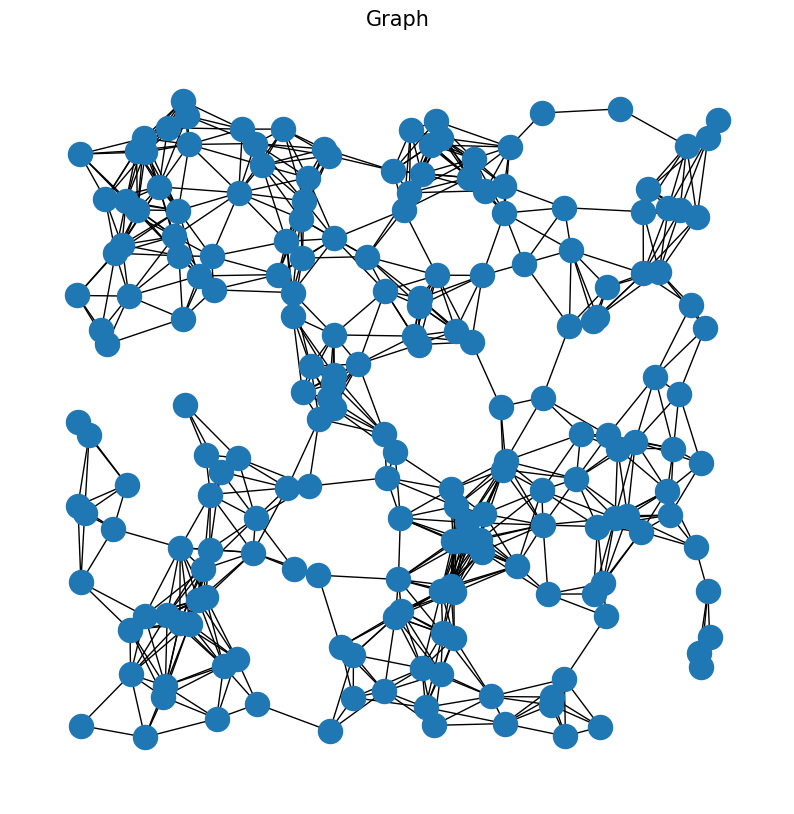

In [31]:
G = nx.random_geometric_graph(n=200, radius=0.125, seed=896803)  # 896803
pos = nx.get_node_attributes(G=G, name="pos")
plt.figure(figsize=(10, 10))
plt.title("Graph", size=15)
nx.draw(G, pos=pos)

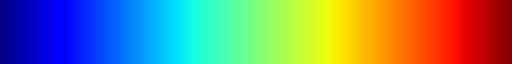

In [32]:
plt.cm.jet

## Degree centrality

**Degree centrality - Definition**  
Degree centrality assigns an importance score based simply on the number of links held by each node.

_What it tells us_: How many direct, ‘one hop’ connections each node has to other nodes in the network.

_When to use it_: For finding very connected individuals, popular individuals, individuals who are likely to hold most information or individuals who can quickly connect with the wider network.

Degree centrality is the simplest measure of node connectivity. Sometimes it’s useful to look at in-degree (number of inbound links) and out-degree (number of outbound links) as distinct measures, for example when looking at transactional data or account activity.


In [33]:
deg_colors = list(G.degree(n) for n in G.nodes)

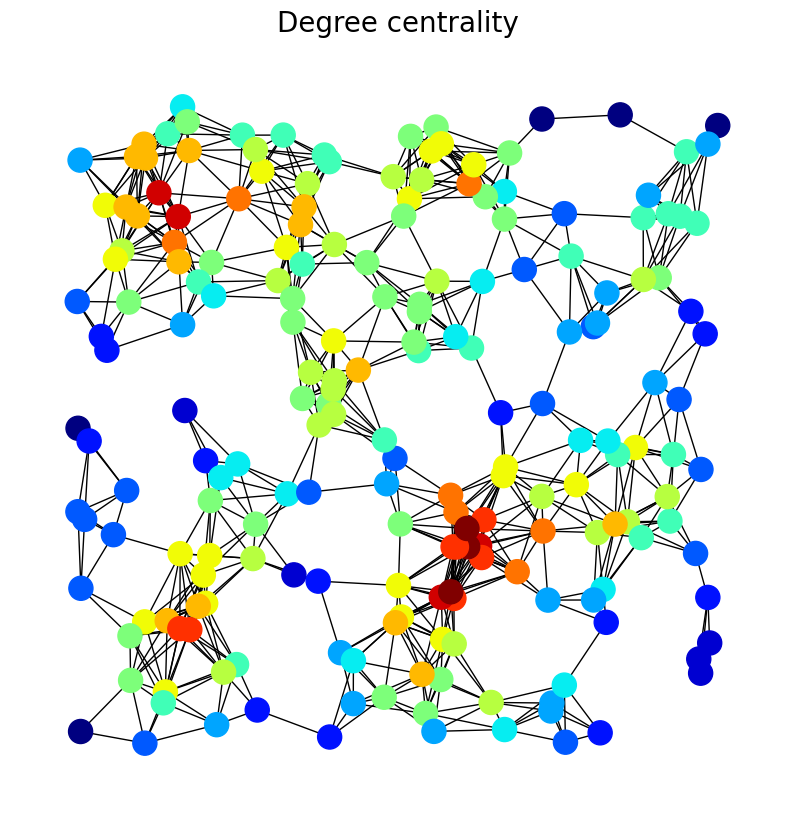

In [34]:
deg_colors = list(G.degree(n) for n in G.nodes)

plt.figure(figsize=(10, 10))
plt.title("Degree centrality", size=20)
nx.draw(G, pos=pos, node_color=deg_colors, cmap=plt.cm.jet)

## Betweenness centrality

**Betweenness centrality -- Definition**  
Measures the bridging capability of a node which is the number of times a node lies on the shortest path between other nodes.

$\text{Btw}(u) = \sum_{i\neq j\neq u \in G} \dfrac {\sigma_{ij}(u)} {\sigma_{ij}}$

Where

- $\sigma_{ij}$ is the total number of shortest paths from node $i$ to node $j$
- $\sigma_{ij}(u)$ is the number of those paths that pass through $u$

Betweenness is useful for analyzing communication dynamics, but should be used with care. A high betweenness count could indicate someone holds authority over disparate clusters in a network, or just that they are on the periphery of both clusters.


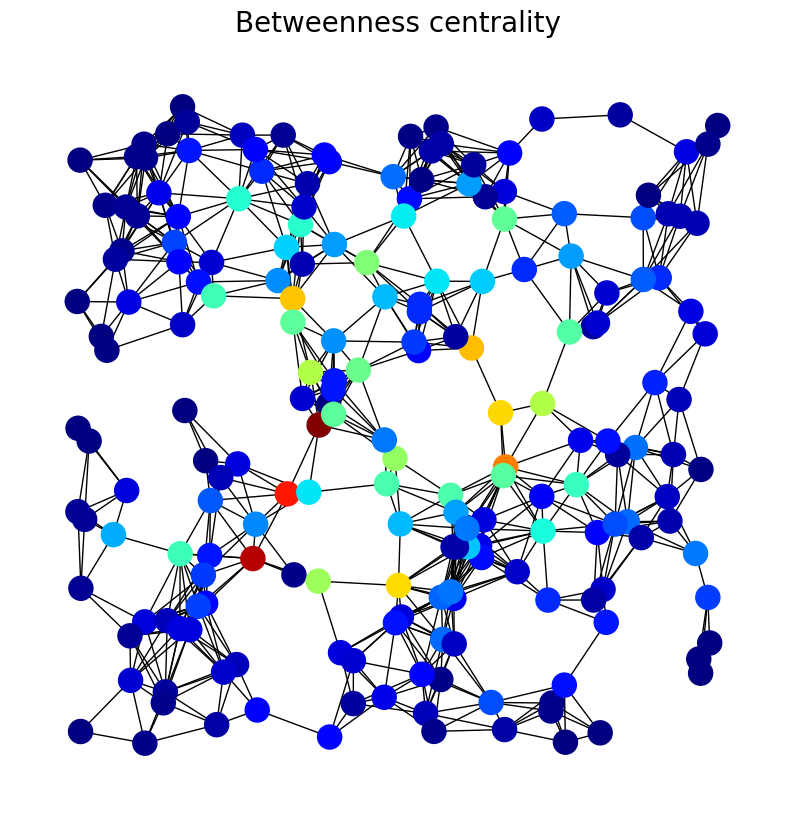

In [35]:
btw_colors = list(nx.betweenness_centrality(G).values())

plt.figure(figsize=(10, 10))
plt.title("Betweenness centrality", size=20)
nx.draw(G, pos=pos, node_color=btw_colors, cmap=plt.cm.jet)

## Closeness centrality

**Closeness**  
Closer to the center of the network = shortest path to everyone else. It's used for finding the individuals who are best placed to influence the entire network most quickly.
$$C(x) = \dfrac 1 {\sum_y d(y,x)}$$


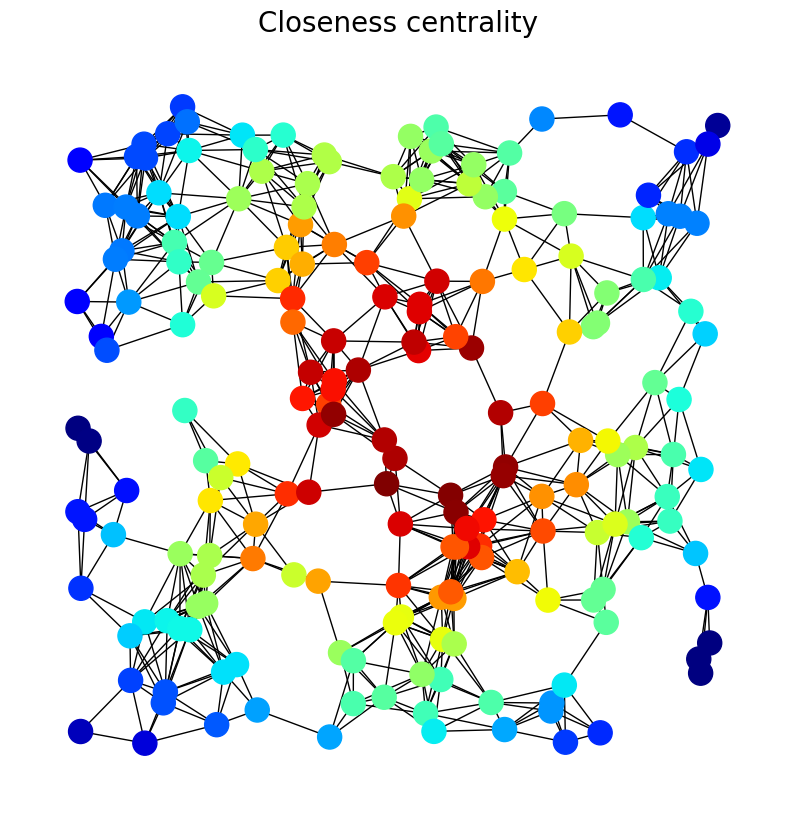

In [36]:
btw_colors = list(nx.closeness_centrality(G).values())

plt.figure(figsize=(10, 10))
plt.title("Closeness centrality", size=20)
nx.draw(G, pos=pos, node_color=btw_colors, cmap=plt.cm.jet)

# Matrix representations


## Adjacency matrix

- [wiki entry](https://en.wikipedia.org/wiki/Adjacency_matrix)


The **adjacency matrix** is a $N \times N$ matrix that has ones where a links between 2 nodes exists and zeros in rest. We usually denote it with $A$

**Properties**
- $A^k$ reveals the number of $k$-step paths between nodes. $A^k_{uv} = a$ means there are $a$ paths of length $k$ between nodes $u,v$
- For an undirected network the matrix is symmetric
- For a weighted graph the matrix has the weights of the edges instead of ones
- You can over a column / row to find the in/out degree of a node

**Remark**

- Real networks are usually sparse(full of zeroes) so a full matrix representation is space-inneficient. Therefore different matrix formats have been used -- CSR, COO


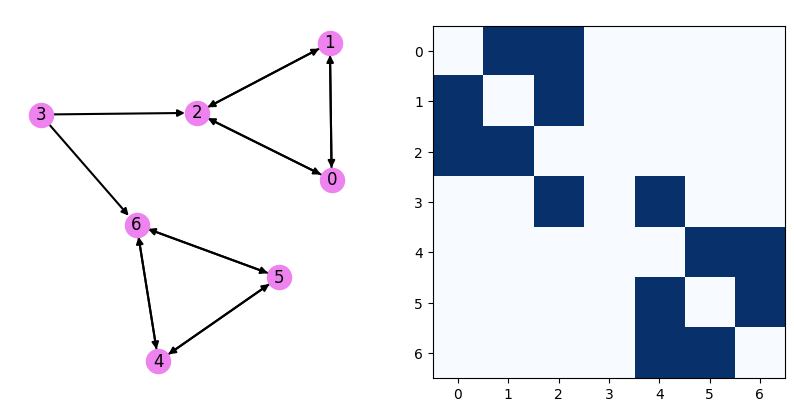

In [66]:
# G = nx.barbell_graph(3, 1)
G = nx.DiGraph(
    [(0, 1), (0, 2), (1, 0), (1, 2), (2, 0), (2, 1), (3, 2), (3, 6), (4, 6), (4, 5), (5, 4), (5, 6), (6, 4), (6, 5)]
)
A = nx.to_numpy_array(G)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
pos = nx.kamada_kawai_layout(G)
nx.draw(
    G,
    pos=pos,
    node_color="violet",
    width=1.5,
    node_size=300,
    with_labels=True,
    ax=axs[0],
)
axs[1].imshow(A, cmap="Blues")
plt.show()

In [67]:
# print(sum(A[0, :]) == G.in_degree(1))
# print(sum(A[:, 5]) == G.out_degree(5))

In [68]:
A_squared = np.linalg.matrix_power(A, 2)
print(A_squared)

[[2. 1. 1. 0. 0. 0. 0.]
 [1. 2. 1. 0. 0. 0. 0.]
 [1. 1. 2. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 2. 1. 1.]
 [0. 0. 0. 0. 1. 2. 1.]
 [0. 0. 0. 0. 1. 1. 2.]]


In [70]:
print(A.sum(axis=0))
print(A.sum(axis=1))

[2. 2. 3. 0. 3. 2. 2.]
[2. 2. 2. 2. 2. 2. 2.]


## Degree matrix

- [wiki](https://en.wikipedia.org/wiki/Degree_matrix)


The degree matrix is a **diagonal matrix** that has the degree of each node on the diagonal. We usually denote it with $D$.

**Reminder**

- The degree of each node represents the neighbourhood size (number of neighbours)
- If $D$ is diagonal then $D^n$ is just raising each element to the $n$th power

**Properties**

- The trace (diagonal sum) of a degree matrix is twice the number of edges


In [40]:
def degree_matrix(G):
    if isinstance(G, nx.DiGraph):
        return np.diag([G.out_degree(u) for u in G.nodes])
    else:
        return np.diag([G.degree(u) for u in G.nodes])

In [41]:
D = degree_matrix(G)
print(D)

[[2 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [42]:
# Check property
print(np.trace(D) == 2 * G.number_of_edges())  # Without 2 for digraph

True


In [43]:
# Check reminder
print(np.all(np.linalg.matrix_power(D, 2) == D**2))

True


**Normalized adjacency matrix**  
We can use the degree matrix to transform the adjacency matrix into a **[stochastic matrix](https://en.wikipedia.org/wiki/Stochastic_matrix)** over rows -- $A_{avg} = D^{-1}A$. We call it a **normalized adjacency matrix**. Intuitively we divide each node by the number of neighbours.

[Sounds familiar?](https://setosa.io/ev/markov-chains/)


In [44]:
A_avg = np.linalg.inv(D) @ A
print(np.round(A_avg, 2))

[[0.   0.5  0.5  0.   0.   0.   0.  ]
 [0.5  0.   0.5  0.   0.   0.   0.  ]
 [0.33 0.33 0.   0.   0.   0.   0.33]
 [0.   0.   0.   0.   0.33 0.33 0.33]
 [0.   0.   0.   0.5  0.   0.5  0.  ]
 [0.   0.   0.   0.5  0.5  0.   0.  ]
 [0.   0.   0.5  0.5  0.   0.   0.  ]]


In [45]:
# After 1 step
print(np.round(np.linalg.matrix_power(A_avg, 2), 2))
print()
# Convergence
print(np.round(np.linalg.matrix_power(A_avg, 100), 2))

[[0.42 0.17 0.25 0.   0.   0.   0.17]
 [0.17 0.42 0.25 0.   0.   0.   0.17]
 [0.17 0.17 0.5  0.17 0.   0.   0.  ]
 [0.   0.   0.17 0.5  0.17 0.17 0.  ]
 [0.   0.   0.   0.25 0.42 0.17 0.17]
 [0.   0.   0.   0.25 0.17 0.42 0.17]
 [0.17 0.17 0.   0.   0.17 0.17 0.33]]

[[0.13 0.13 0.19 0.19 0.12 0.12 0.13]
 [0.13 0.13 0.19 0.19 0.12 0.12 0.13]
 [0.13 0.13 0.19 0.19 0.12 0.12 0.12]
 [0.12 0.12 0.19 0.19 0.13 0.13 0.12]
 [0.12 0.12 0.19 0.19 0.13 0.13 0.13]
 [0.12 0.12 0.19 0.19 0.13 0.13 0.13]
 [0.13 0.13 0.19 0.19 0.13 0.13 0.13]]


**Symmetric normalized adjacency matrix**  
Intuitively we divide each node by the size of the neighbourhood and also by the size of our neighbourhood.

$$D^{-1/2}AD^{-1/2}$$

_Intuition_: https://math.stackexchange.com/questions/3035968/interpretation-of-symmetric-normalised-graph-adjacency-matrix


In [46]:
A_ = np.sqrt(np.linalg.inv(D)) @ A @ np.sqrt(np.linalg.inv(D))
print(np.round(A_, 2))

[[0.   0.5  0.41 0.   0.   0.   0.  ]
 [0.5  0.   0.41 0.   0.   0.   0.  ]
 [0.41 0.41 0.   0.   0.   0.   0.41]
 [0.   0.   0.   0.   0.41 0.41 0.41]
 [0.   0.   0.   0.41 0.   0.5  0.  ]
 [0.   0.   0.   0.41 0.5  0.   0.  ]
 [0.   0.   0.41 0.41 0.   0.   0.  ]]


# Consensus and diffusion on networks

One aspect we want to study about networks is how information spreads. Suppose each node has an opinion. His opinion represents a number. We'll store the opinions in a vector $x \in \mathbb R^n$. To see how information spreads we can multiply the vector $x$ with the stochastic matrix $S$. 

Because in the stochastic matrix, the neighbours have values and the rest are zeroes, the multiplication will be a weighted sum of the neighbours' opinions. This is a simple model of how information spreads.

$$
x_{t+1} = Sx_{t}
$$

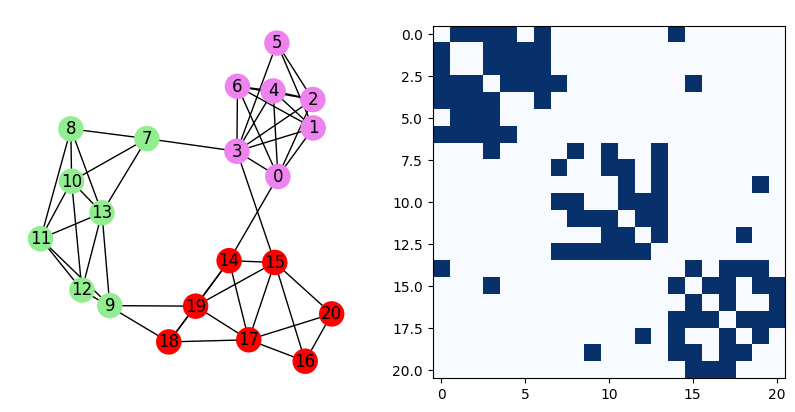

In [152]:
sizes = [7, 7, 7]
g = nx.random_partition_graph(sizes=sizes, p_in=0.7, p_out=0.05, seed=42)
A = nx.adjacency_matrix(g).todense()

colors = ["violet", "lightgreen", "red"]
node_color = [colors[v] for v in nx.get_node_attributes(g, "block").values()]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
pos = nx.kamada_kawai_layout(g)
nx.draw(
    g,
    pos=pos,
    node_color=node_color,
    # width=1.5,
    # node_size=300,
    with_labels=True,
    ax=axs[0],
)
axs[1].imshow(A, cmap="Blues")
plt.show()

In [153]:
g.nodes.data("block")

NodeDataView({0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 2, 20: 2}, data='block')

In [154]:
# Random opinion vector
x = np.random.random(sum(sizes))
x[sizes[0] : sizes[0] + sizes[1]] += 0.25
x[sizes[0] + sizes[1] :] += 0.5
print(x)

# Get the stochastic matrix
S = nx.adjacency_matrix(g).todense()
S = S / np.sum(S, axis=1)
# Collect the opinion vector after each step to see diffusion
xs = []
xs.append(x)

steps = 10
for _ in range(steps):
    x = x @ S
    xs.append(x)

xs = np.array(xs)

[0.7710098  0.60290261 0.67145141 0.34126087 0.67633338 0.05051382
 0.8896672  0.26651004 0.66521941 1.14660562 0.87245115 0.80491007
 0.39567097 1.0792769  1.18103489 1.42393677 1.23022771 1.27122337
 0.82321772 1.3853973  0.64725831]


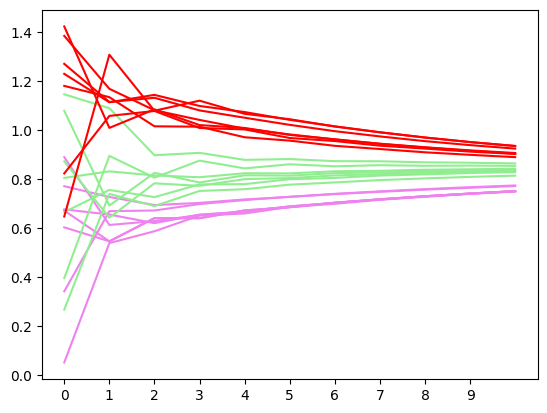

In [155]:
for n, block in g.nodes.data("block"):
    plt.plot(xs[:, n], c=colors[block])
plt.xticks(range(steps))
plt.show()

In [156]:
1 / np.linalg.eigvals(S)[1]

1.0929645168580362